# Imports for Zgoubidoo and Python environment
Typical imports for an interactive notebook. The `autoreload` extension is activated for easy development in an external editor.

The not-so-special variable `_` is the unit registry for easy access to units (e.g. `_.cm`).

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zgoubidoo
from zgoubidoo.commands import *
_ = zgoubidoo.ureg

# Creation of FODO cells

`Objet5` is required for the Twiss computation. The _drifts_ are replaced with `Bend` with vanishing B-field so that the tracks for these elements are also provided (this allows to obtain nice Twiss plots).

In [5]:
di = zgoubidoo.Input('FODO')
di += Objet5('BUNCH', BORO=2149 * _.kilogauss * _.cm, PY = .1, PT = .1, PZ = 1, PP = 1, PX = .1, PD =0.01)
di += Proton()
q1 = Quadrupole('QUAD1',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q2 = Quadrupole('QUAD2',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q3 = Quadrupole('QUAD3',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q4 = Quadrupole('QUAD4',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=1*_.mm,
) 
q5 = Quadrupole('QUAD5',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q6 = Quadrupole('QUAD6',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q7 = Quadrupole('QUAD7',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=1*_.mm,
) 
q8 = Quadrupole('QUAD8',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q9 = Quadrupole('QUAD9',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 

di += q1
di += Bend('D1',
    XL= 150 * _.mm,
    B1= 0.01 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q2
di += Bend('D2',
    XL= 150 * _.mm,
    B1= 0.01 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q3
di += Matrix()
di += q4
di += Bend('D3',
    XL= 150 * _.mm,
    B1= 0.1 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q5
di += Bend('D4',
    XL= 150 * _.mm,
    B1= 0.01 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q6
di += Matrix()
di += q7
di += Bend('D5',
    XL= 150 * _.mm,
    B1= 0.1 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q8
di += Bend('D6',
    XL= 150 * _.mm,
    B1= 0.01 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=2,
)
di += q9
di += Matrix()
di.XPAS = 1 * _.mm

z = zgoubidoo.Zgoubi()
out = z(di)
print('\n'.join(out.results[0]['result']))

FODO
 
 
 'OBJET' BUNCH                                                                                                1
2.149000000000e+03
5.01
1.000000000000e-01 1.000000000000e-01 1.000000000000e+00 1.000000000000e+00 1.000000000000e-01 1.000000000000e-02
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
 
 'PARTICUL' PROTON                                                                                            2
9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
 
 
 'QUADRUPO' QUAD1                                                                                             3
2
5.000000000000e+00 1.000000000000e+00 8.000000000000e+00
0.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.0000000

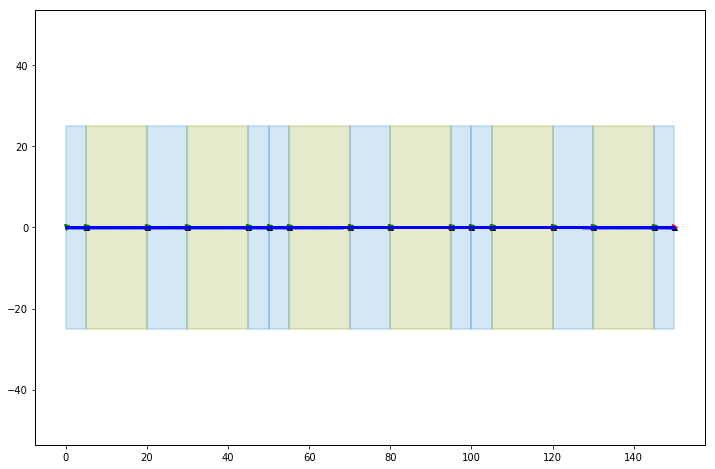

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

zmpl = zgoubidoo.vis.ZgoubiMpl(ax, with_frames=True, with_boxes=True, with_drifts=True)
tracks = zgoubidoo.read_plt_file()
line = zgoubidoo.survey(beamline=di, reference_frame=Frame())
zgoubidoo.vis.plot(beamline=line, 
                        artist=zmpl, 
                        tracks=tracks, 
                        )
ax.set_aspect('equal', 'datalim')

# Twiss computation from Zgoubi

First we read the periodic values of the Twiss parameters, as computed by `Zgoubi`. `Matrix` is repeated at the end of each cell of the previous `Input`, we correctly observe that the periodicity is still present (all three lines of the `DataFrame` are equal).

In [6]:
twiss_init = zgoubidoo.read_matrix_file()
twiss_init[['BETA11', 'ALPHA11', 'GAMMA11', 'BETA22', 'ALPHA22', 'GAMMA22', 'R11']]

,BETA11,ALPHA11,GAMMA11,BETA22,ALPHA22,GAMMA22,R11
0,0.931184,-6.891915e-07,1.073901,0.422212,-0.000196,2.368477,0.682754
1,0.931185,-1.277387e-06,1.073901,0.422270,-0.000280,2.368155,-0.067693
2,0.931187,-1.881401e-06,1.073898,0.422494,-0.000379,2.366896,-0.775190


# Step-by-step Twiss computation with Zgoubidoo

In [7]:
tracks = zgoubidoo.read_plt_file()
matrix = zgoubidoo.twiss.compute_transfer_matrix(di, tracks, align_on='X')
twiss = zgoubidoo.twiss.compute_twiss(matrix, twiss_init.iloc[-1])
twiss.head(5)

,index,R11,R21,R31,R41,R12,R22,R32,R42,R13,...,BETA11,BETA22,ALPHA11,ALPHA22,GAMMA11,GAMMA22,MU1,MU2,DET1,DET2
0,0,1.000000,0.000000,0.0,0.0,0.000,1.000000,0.0,0.0,0.0,...,0.931187,0.422494,-0.000002,-0.000379,1.073898,2.366896,1.000000,1.000000,1.0,1.0
1,1,0.999981,-0.037226,0.0,0.0,0.001,0.999981,0.0,0.0,0.0,...,0.931154,0.422513,0.033588,-0.018474,1.075148,2.367598,0.999999,0.999997,1.0,1.0
2,2,0.999926,-0.074451,0.0,0.0,0.002,0.999926,0.0,0.0,0.0,...,0.931053,0.422568,0.067174,-0.036572,1.078899,2.369647,0.999998,0.999989,1.0,1.0
3,3,0.999832,-0.111674,0.0,0.0,0.003,0.999832,0.0,0.0,0.0,...,0.930885,0.422659,0.100749,-0.054676,1.085150,2.373044,0.999995,0.999975,1.0,1.0
4,4,0.999702,-0.148892,0.0,0.0,0.004,0.999702,0.0,0.0,0.0,...,0.930650,0.422787,0.134309,-0.072787,1.093901,2.377789,0.999991,0.999955,1.0,1.0


# Twiss plots

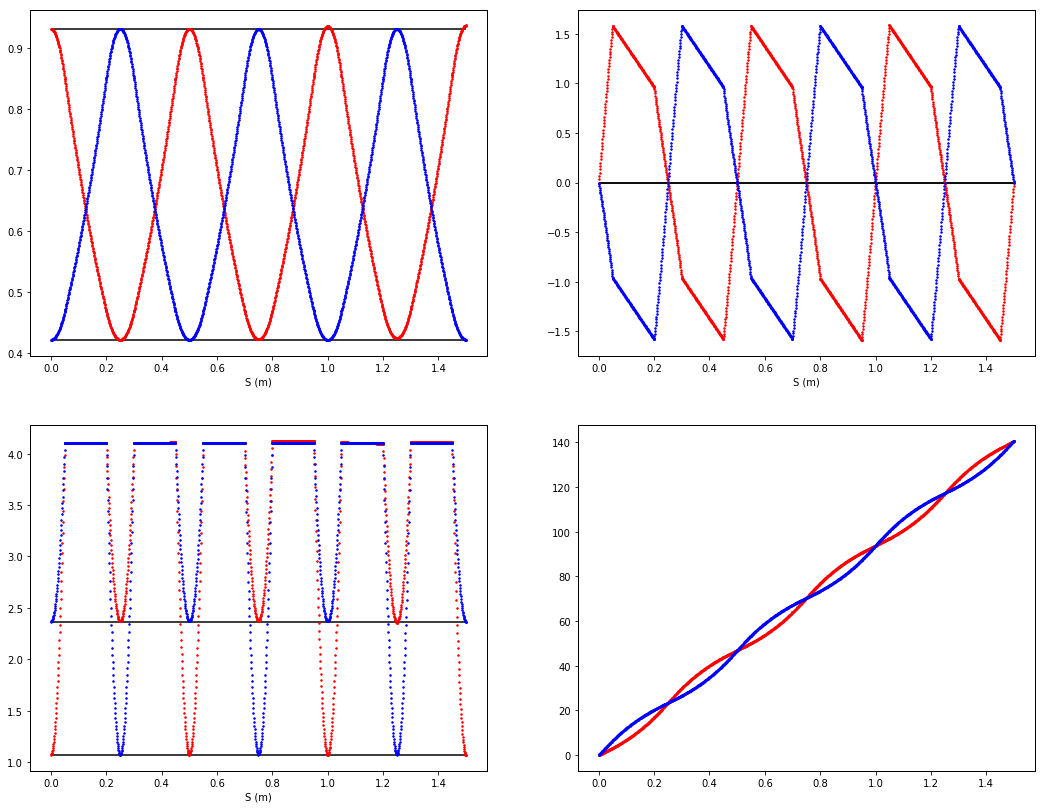

In [26]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(221)
ax.plot(twiss['S'], twiss['BETA11'], 'r.')
ax.plot(twiss['S'], twiss['BETA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['BETA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['BETA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(222)
ax.plot(twiss['S'], twiss['ALPHA11'], 'r.')
ax.plot(twiss['S'], twiss['ALPHA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['ALPHA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['ALPHA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(223)
ax.plot(twiss['S'], twiss['GAMMA11'], 'r.')
ax.plot(twiss['S'], twiss['GAMMA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['GAMMA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['GAMMA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(224)
ax.plot(twiss['S'], np.degrees(np.arccos(twiss['MU1'])), 'r.')
ax.plot(twiss['S'], np.degrees(np.arccos(twiss['MU2'])), 'b.')

plt.show()